In [8]:
!pip install fastdtw
!pip install dtw-python

import numpy as np 
# from scipy.spatial.distance import euclidean
from dtw import dtw
import json
import glob 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def compute_distance(x, y):
    alignment = dtw(x, y, keep_internals=True)
    # alignment.plot(type="threeway")
    # return alignment.normalizedDistance
    return alignment.normalizedDistance

In [3]:
def preload_survey_responses():
    responses = {}

    for response in glob.glob("../data/user_responses/*.json"):
        response_tag = response.split("/")[3].split(".")[0]

        with open(response) as f:
            survey_response = json.load(f)

        responses[response_tag] = survey_response

    return responses

def preload_dataset_responses(): 
    responses = {} 

    for response in glob.glob("../data/dataset_responses/*.json"):
        response_tag = response.split("/")[3].split(".")[0]

        with open(response) as f:
            survey_response = json.load(f)

        responses[response_tag] = survey_response

    return responses

def get_four_point_score(response):
    total_score = 0
    total_responses = 0

    total_score += 1 * response["1"]
    total_responses += response["1"]
    
    total_score += 2 * response["2"]
    total_responses += response["2"]
    
    total_score += 3 * response["3"]
    total_responses += response["3"]
    
    total_score += 4 * response["4"]
    total_responses += response["4"]

    return total_score / total_responses

In [89]:
def preload_datasets(normalised):
    datasets = {} 

    if (normalised == True):
        folder = "../data/formatted_datasets/*.json"
    else: 
        folder = "../data/formatted_unnormalised_datasets/*.json"
    
    for dataset in glob.glob(folder):
        ink_tag = dataset.split("/")[3].split(".")[0]
        
        with open(dataset) as f:
            dataset_ink = json.load(f)

        datasets[ink_tag] = dataset_ink

    return datasets

def preload_user_ink(): 
    user_ink = {} 
    
    for filename in glob.glob("../data/formatted_ink/*.json"):
        ink_tag = filename.split("/")[3].split(".")[0]
        
        with open(filename) as f:
            ink = json.load(f)

        user_ink[ink_tag] = ink

    return user_ink

In [90]:
datasets = preload_datasets(True)
unnormalised_datasets = preload_datasets(False)
user_ink_submissions = preload_user_ink()
survey_responses = preload_survey_responses()
dataset_responses = preload_dataset_responses()

# Get Average DTW Distances

In [82]:
four_point_scores = []
distances = []

for user_tag in user_ink_submissions.keys():
    user_ink = user_ink_submissions[user_tag]

    ink = np.array([user_ink["x"], user_ink["y"]])
    ink = np.swapaxes(ink, 0, 1)

    num_samples = 0
    total_distance = 0
    for key in datasets.keys():
        dataset_ink = datasets[key]
        num_samples += 1

        dataset_ink = np.array([dataset_ink["x"], dataset_ink["y"]])
        dataset_ink = np.swapaxes(dataset_ink, 0, 1)

        # dataset_ink = np.array(dataset_ink["p"])
        # dataset_ink = np.swapaxes(dataset_ink, 0, 1)

        total_distance += compute_distance(ink, dataset_ink)

    print(user_tag, get_four_point_score(survey_responses[user_tag]), total_distance/num_samples)

    # plt.figure(figsize=(20,5))
    # plt.plot(user_ink["x"], user_ink["y"])
    # plt.gca().invert_yaxis()
    # plt.show()

    distances.append(total_distance/num_samples)
    four_point_scores.append(get_four_point_score(survey_responses[user_tag]))

8Z8Zk6qnS4S74FIpjs3l 3.8181818181818183 0.22091449247951842
4DEx1UITVvHf7r8utD9Z 2.8181818181818183 0.21118729781959653
8e05bbCJrJlptvjGm1xa 3.0 0.19938958532877427
pwzrwYnnyBRiJaBuWCvZ 3.5 0.22014373202924664
2x7KWpGxDjsH40bJvsP7 2.3636363636363638 0.1997496732568939
QVsCfGYE28LsGxDa1417 2.823529411764706 0.2049977525217326
UJmJnIqlwsNEFfjKelTN 2.8181818181818183 0.19102256254712335
oIH1HmVVxrJVAXRbwjxk 3.1818181818181817 0.21314763329173803
i7pJPDAihjRnN4VGZNKG 3.1818181818181817 0.20038455001066507
lbk43HuL5voOJI49qHRm 3.909090909090909 0.26236240247224174
L1l3xQZg4erNtCnqpgDX 3.1818181818181817 0.22141309778376655
UpjeWjdH7HrpzNvAOnZE 3.5454545454545454 0.19882600099234637
eWYRgAeE4psads07EGIm 4.0 0.24926487720987572
wHbt2fWqZGeUgdc54FEG 4.0 0.20304053632914784


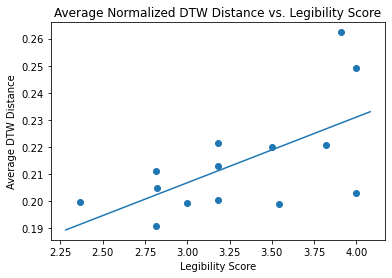

In [83]:
plt.scatter(four_point_scores, distances)
plt.xlabel("Legibility Score")
plt.ylabel("Average DTW Distance")
plt.title("Average Normalized DTW Distance vs. Legibility Score")
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(four_point_scores, distances, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')
plt.savefig('../plots/dtw_distance_all_datasets.png', facecolor = 'w')
plt.show()

# Display mean scores for dataset responses

In [48]:
for key, value in dataset_responses.items():
    print(key, get_four_point_score(value))

001g 3.823529411764706
001 3.0625
001c 3.076923076923077
001d 3.4615384615384617
001e 3.375
001a 3.6470588235294117
001f 3.5833333333333335
001b 3.4545454545454546


# Plot DTW Distance for top 2 dataset samples


In [84]:
four_point_scores = []
distances = []

for user_tag in user_ink_submissions.keys():
    user_ink = user_ink_submissions[user_tag]

    user_ink = np.array([user_ink["x"], user_ink["y"]])
    user_ink = np.swapaxes(user_ink, 0, 1)

    num_samples = 0
    total_distance = 0
    for key in ['001g', '001a']:
        dataset_ink = datasets[key]
        num_samples += 1

        dataset_ink = np.array([dataset_ink["x"], dataset_ink["y"]])
        dataset_ink = np.swapaxes(dataset_ink, 0, 1)

        total_distance += compute_distance(user_ink, dataset_ink)

    print(user_tag, get_four_point_score(survey_responses[user_tag]), total_distance/num_samples)
    
    distances.append(total_distance/num_samples)
    four_point_scores.append(get_four_point_score(survey_responses[user_tag]))

8Z8Zk6qnS4S74FIpjs3l 3.8181818181818183 0.22065325961643412
4DEx1UITVvHf7r8utD9Z 2.8181818181818183 0.1936602710116612
8e05bbCJrJlptvjGm1xa 3.0 0.1826349412426932
pwzrwYnnyBRiJaBuWCvZ 3.5 0.2059385879280796
2x7KWpGxDjsH40bJvsP7 2.3636363636363638 0.19459582208524073
QVsCfGYE28LsGxDa1417 2.823529411764706 0.21003341606560566
UJmJnIqlwsNEFfjKelTN 2.8181818181818183 0.18088456634995045
oIH1HmVVxrJVAXRbwjxk 3.1818181818181817 0.1588559727571784
i7pJPDAihjRnN4VGZNKG 3.1818181818181817 0.20196225858854683
lbk43HuL5voOJI49qHRm 3.909090909090909 0.21978217866881472
L1l3xQZg4erNtCnqpgDX 3.1818181818181817 0.23445180292518253
UpjeWjdH7HrpzNvAOnZE 3.5454545454545454 0.14695268336074369
eWYRgAeE4psads07EGIm 4.0 0.21885189335895927
wHbt2fWqZGeUgdc54FEG 4.0 0.19219305500273826


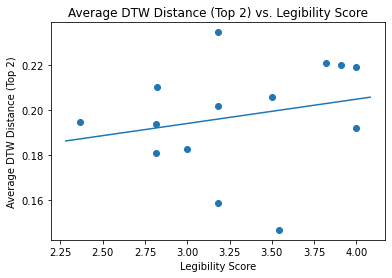

In [85]:
plt.scatter(four_point_scores, distances)
plt.xlabel("Legibility Score")
plt.ylabel("Average DTW Distance (Top 2)")
plt.title("Average DTW Distance (Top 2) vs. Legibility Score")
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(four_point_scores, distances, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')
plt.savefig('../plots/dtw_distance_top_2_datasets.png', facecolor = 'w')
plt.show()

# Plot dtw distance for user submissions against OTHER user submissions
Only legible user submissions compared to

In [94]:
four_point_scores = []
distances = []

for user_tag in user_ink_submissions.keys():
    user_ink = user_ink_submissions[user_tag]

    ink = np.array([user_ink["x"], user_ink["y"]])
    ink = np.swapaxes(ink, 0, 1)

    num_samples = 0
    total_distance = 0
    
    for user_tag_other in ['8Z8Zk6qnS4S74FIpjs3l', 'lbk43HuL5voOJI49qHRm', 'eWYRgAeE4psads07EGIm', 'wHbt2fWqZGeUgdc54FEG']:
    # for user_tag_other in user_ink_submissions.keys():
        if user_tag_other != user_tag:
            user_ink_other = user_ink_submissions[user_tag_other]

            num_samples += 1

            other_ink = np.array([user_ink_other["x"], user_ink_other["y"]])
            other_ink = np.swapaxes(other_ink, 0, 1)

            total_distance += compute_distance(ink, other_ink)

    print(user_tag, get_four_point_score(survey_responses[user_tag]), total_distance/num_samples)

    distances.append(total_distance/num_samples)
    four_point_scores.append(get_four_point_score(survey_responses[user_tag]))

8Z8Zk6qnS4S74FIpjs3l 3.8181818181818183 0.19057622444178116
4DEx1UITVvHf7r8utD9Z 2.8181818181818183 0.2242492580623096
8e05bbCJrJlptvjGm1xa 3.0 0.21956634240650402
pwzrwYnnyBRiJaBuWCvZ 3.5 0.19333797150648224
2x7KWpGxDjsH40bJvsP7 2.3636363636363638 0.23305476249712873
QVsCfGYE28LsGxDa1417 2.823529411764706 0.21707085591403213
UJmJnIqlwsNEFfjKelTN 2.8181818181818183 0.23044581665388195
oIH1HmVVxrJVAXRbwjxk 3.1818181818181817 0.21931886377807686
i7pJPDAihjRnN4VGZNKG 3.1818181818181817 0.23381453386857332
lbk43HuL5voOJI49qHRm 3.909090909090909 0.22384839270610876
L1l3xQZg4erNtCnqpgDX 3.1818181818181817 0.2178873662620038
UpjeWjdH7HrpzNvAOnZE 3.5454545454545454 0.20638639329559816
eWYRgAeE4psads07EGIm 4.0 0.19048819453289279
wHbt2fWqZGeUgdc54FEG 4.0 0.21399585142002583


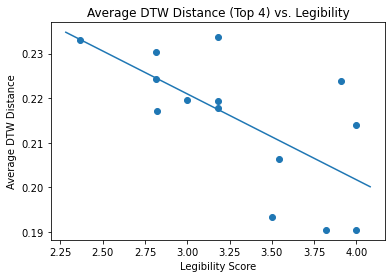

In [95]:
plt.scatter(four_point_scores, distances)
plt.xlabel("Legibility Score")
plt.ylabel("Average DTW Distance")
plt.title("Average DTW Distance (Top 4) vs. Legibility")
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(four_point_scores, distances, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')
plt.savefig('../plots/dtw_distance_top_4_users.png', facecolor = 'w')
plt.show()

# Plot y variation for dataset responses


In [92]:
four_point_scores = []
y_variation = []

for dataset, ink in unnormalised_datasets.items():
    y = np.array(ink["y"])

    four_point_scores.append(get_four_point_score(dataset_responses[dataset]))
    y_variation.append(np.std(y))

    # print(dataset, get_four_point_score(dataset_responses[dataset]))

    # plt.figure(figsize=(20,5))
    # plt.plot(ink["x"], ink["y"])
    # plt.gca().invert_yaxis()
    # plt.show()

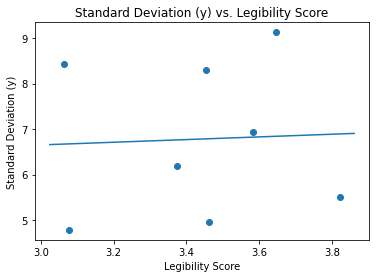

In [93]:
plt.scatter(four_point_scores, y_variation)
plt.xlabel("Legibility Score")
plt.ylabel("Standard Deviation (y)")
plt.title("Standard Deviation (y) vs. Legibility Score")
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(four_point_scores, y_variation, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
axes.plot(color='w')
plt.plot(X_plot, m*X_plot + b, '-')
plt.savefig('../plots/std_dataset.png', facecolor = 'w')
plt.show()

# Plot Y Variance vs four point score for user responses 

In [52]:
four_point_scores = []
y_variation = []

for user_submission in glob.glob("../data/formatted_unnormalised_ink/*.json"):
    user_tag = user_submission.split("/")[3].split(".")[0]
    
    with open(user_submission) as f:
        user_ink = json.load(f)

    y = np.array(user_ink["y"])

    # q75, q25 = np.percentile(y, [75 ,25])
    # iqr = q75 - q25

    four_point_scores.append(get_four_point_score(survey_responses[user_tag]))
    y_variation.append(np.var(y))


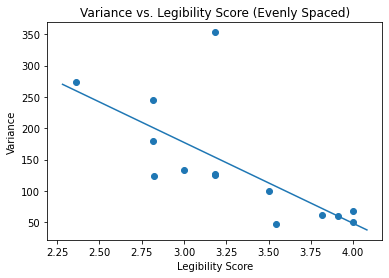

In [53]:
plt.scatter(four_point_scores, y_variation)
plt.xlabel("Legibility Score")
plt.ylabel("Variance")
plt.title("Variance vs. Legibility Score (Evenly Spaced)")
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(four_point_scores, y_variation, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
axes.plot(color='w')
plt.plot(X_plot, m*X_plot + b, '-')
plt.savefig('../variance_evenly_spaced.png', facecolor = 'w')
plt.show()

In [60]:
with open("../data/formatted_ink/2x7KWpGxDjsH40bJvsP7.json") as f:
        user_ink = json.load(f) 

user_ink = np.array(user_ink["y"])
# user_ink = np.swapaxes(user_ink, 0, 1)

with open("../data/formatted_datasets/001a.json") as f:
        dataset_ink = json.load(f)

dataset_ink = np.array(dataset_ink["y"])
# dataset_ink = np.swapaxes(dataset_ink, 0, 1)

In [61]:
alignment = dtw(user_ink, dataset_ink, keep_internals=True)

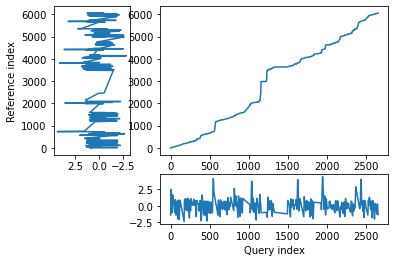

<AxesSubplot:>

In [62]:
alignment.plot(type="threeway")

In [17]:
print(alignment.distance)
print(alignment.normalizedDistance)

1093.8287369609209
0.1785551317272153
